## Agriculture: Pest Outbreak Prediction

This addresses a critical challenge in agriculture, as pest outbreaks can devastate crops. 
Implementing AI models that analyze weather data, satellite imagery, and farmer reports could provide early warnings, 
enabling farmers to take preventive action and minimize losses.

In [1]:
import pandas as pd
import random

#balancing with smote
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to generate synthetic data
def generate_data(num_rows):
    data = {
        "Region": [random.choice(["Nyeri", "Nairobi", "Mombasa", "Kisumu", "Eldoret"]) for _ in range(num_rows)],
        "Temperature": [random.uniform(20, 35) for _ in range(num_rows)],
        "Humidity": [random.uniform(50, 90) for _ in range(num_rows)],
        "NDVI": [random.uniform(0.2, 0.8) for _ in range(num_rows)],
        "Pest_Probability": [random.choice([0, 1]) for _ in range(num_rows)]  # 0: No outbreak, 1: Outbreak
    }
    return pd.DataFrame(data)

In [3]:
# Generate dataset
num_rows = 100000
df = generate_data(num_rows)

# Save to a CSV file
df.to_csv("AssignData/synthetic_pest_data.csv", index=False)
print(f"Dataset with {num_rows} rows generated successfully!")

Dataset with 100000 rows generated successfully!


In [4]:
# Load dataset
df = pd.read_csv("AssignData/synthetic_pest_data.csv")

# Split features and target variable
X = df[["Temperature", "Humidity", "NDVI"]]
y = df["Pest_Probability"]

# Standardize features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Data successfully balanced using SMOTE!")

Data successfully balanced using SMOTE!


In [7]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [8]:
# Test the model
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      9981
           1       0.50      0.49      0.50     10019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



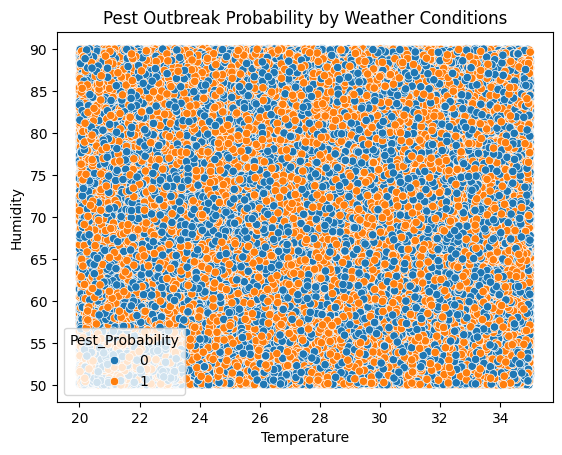

In [9]:
sns.scatterplot(x=df["Temperature"], y=df["Humidity"], hue=df["Pest_Probability"])
plt.title("Pest Outbreak Probability by Weather Conditions")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()